In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [54]:
file_path = r"D:\01_Información\05_Ingeniería civil\02_Cursos\09_Programación\MENTHOR_Python aplicado a geotecnia\Clase 03\101.xlsx"

est = pd.read_excel(file_path, sheet_name="ESTRATO")
lab = pd.read_excel(file_path, sheet_name="Muestras")
spt = pd.read_excel(file_path, sheet_name="Spt")
vel = pd.read_excel(file_path, sheet_name="Veleta")


<function matplotlib.pyplot.show(close=None, block=None)>

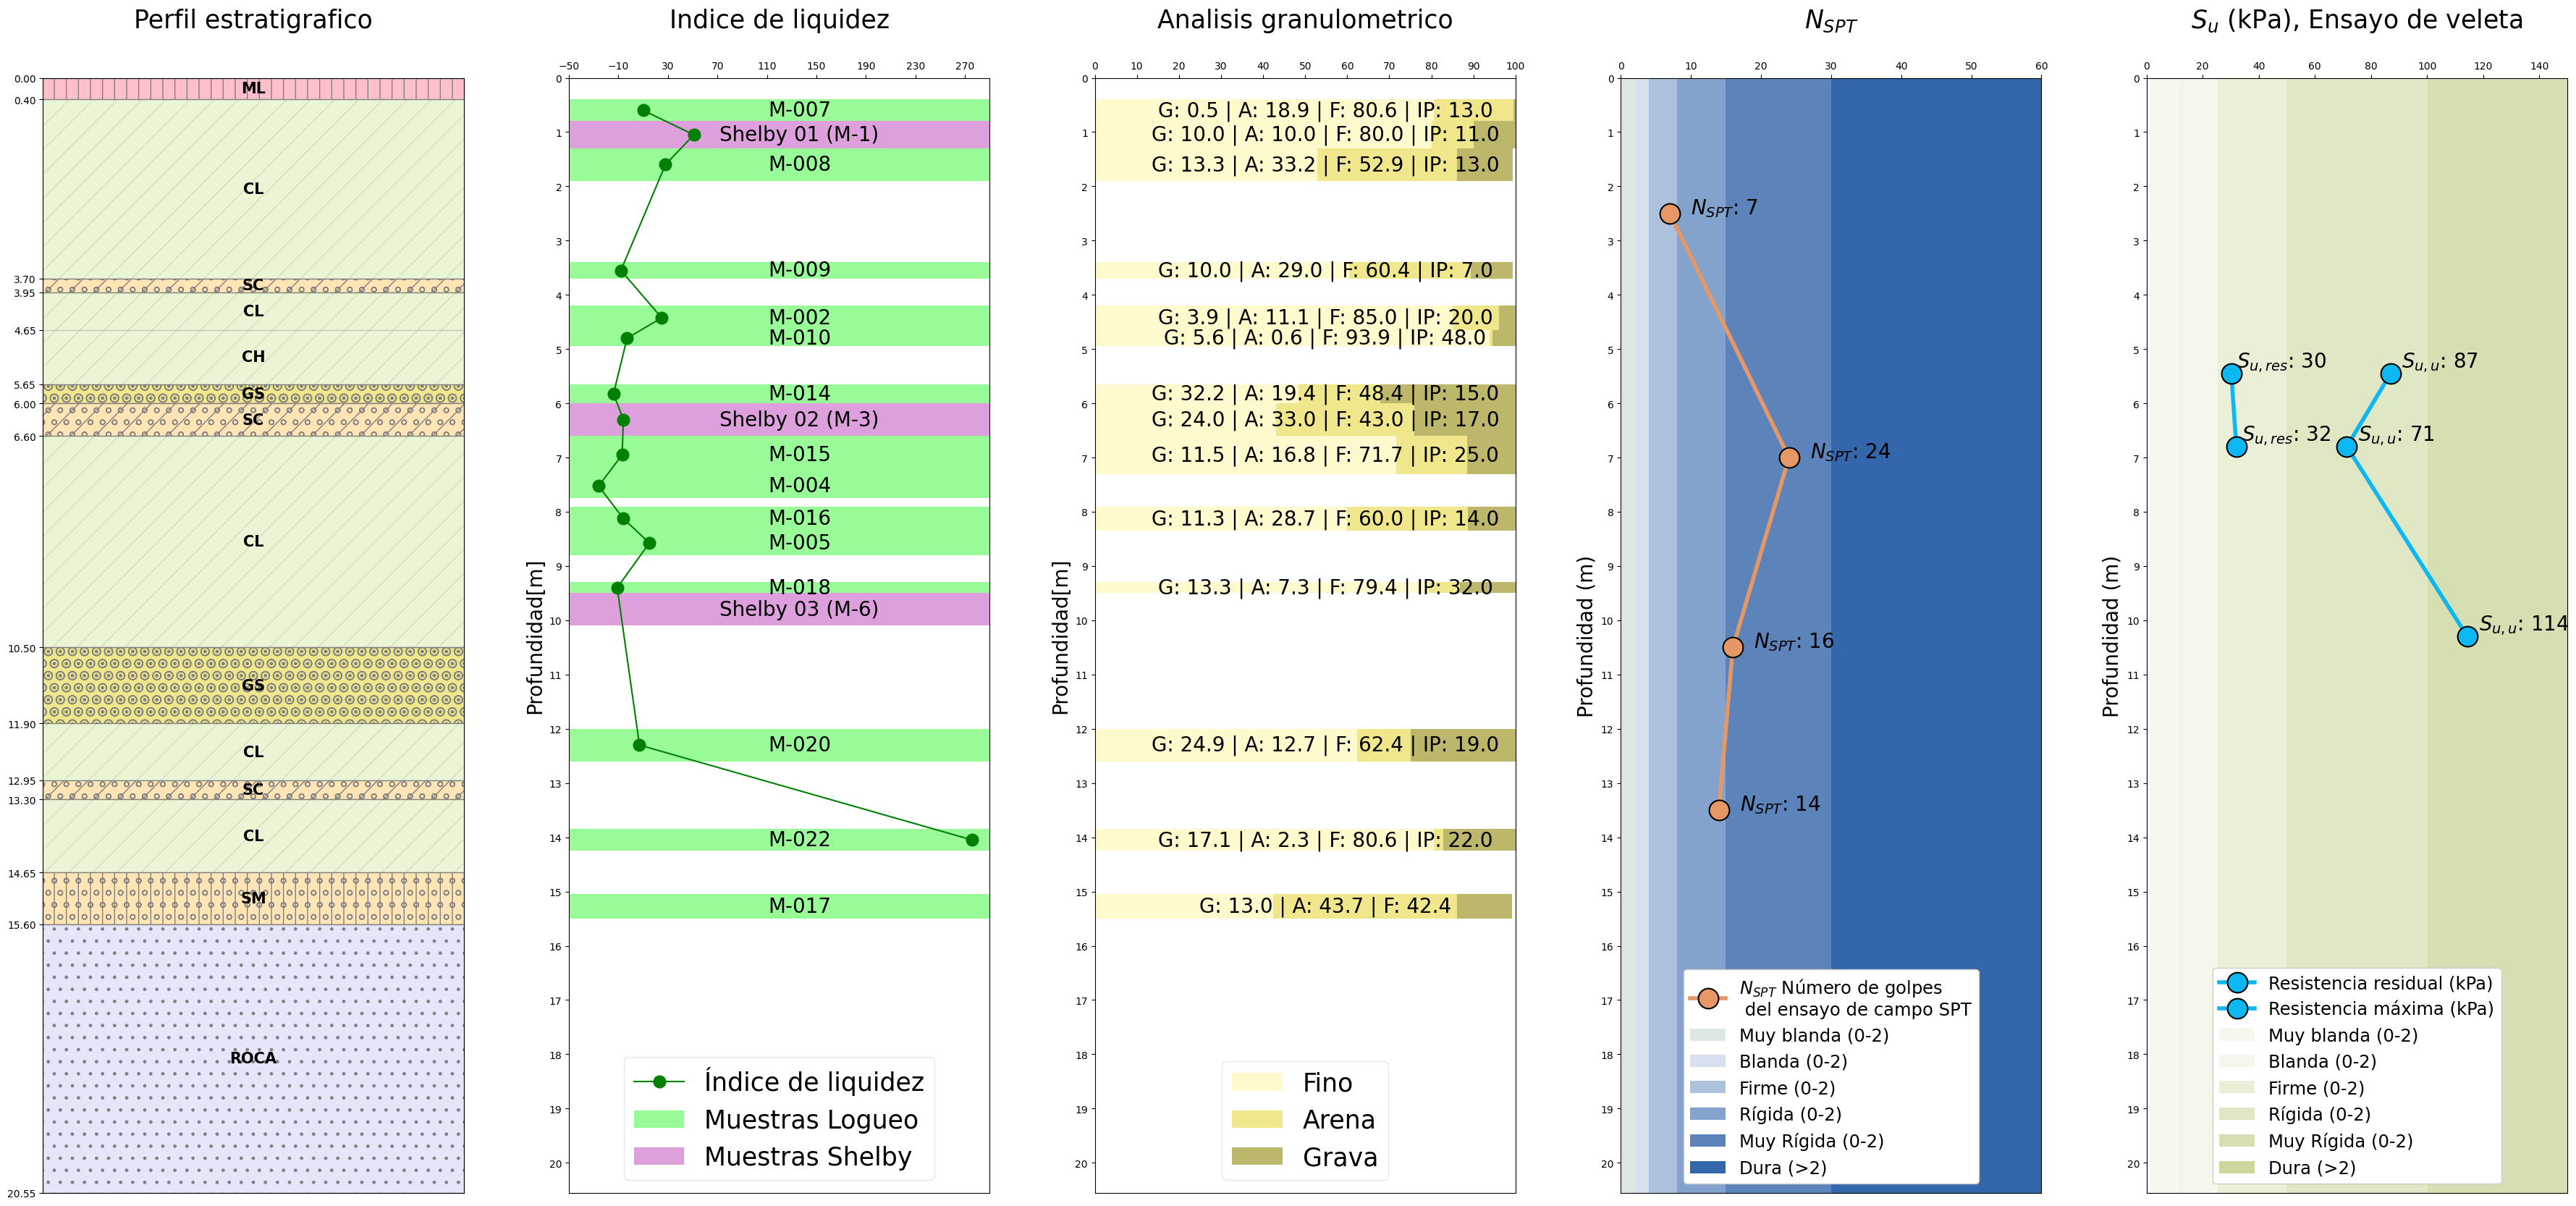

In [ ]:
fig = plt.figure(figsize=(45,20),dpi=100)
gs = fig.add_gridspec(1,5, wspace=0.25)
#-----------------------------------------------------------
#Perfil estratigrafico
ax1 = fig.add_subplot(gs[0,0])

#Calculos relacionados a la estratigrafia
Hmax = max(est["Fin"])                      #Profundidad de la investigación
est["espesor"] = est["Fin"].diff()          #Diferencia entre datos continuos
h_inicial = est["Fin"][0]                   #Espesor inicial
est.loc[est.index[0], "espesor"] = h_inicial

for i in range(len(est)):
    sucs = est["Estrato"][i]

    if sucs[0] in ["C","O"]:
        p=ax1.bar(1,est["espesor"][i],bottom=est["Fin"][i]-est["espesor"][i],color='#9ACD32', hatch ="/", edgecolor="gray",alpha=0.2)
    elif sucs[0] == "M":
        p=ax1.bar(1,est["espesor"][i],bottom=est["Fin"][i]-est["espesor"][i],color='#FFC0CB', hatch ="|", edgecolor="gray")
    elif sucs == "SC":
        p=ax1.bar(1,est["espesor"][i],bottom=est["Fin"][i]-est["espesor"][i],color='#FFE4B5', hatch ="/o", edgecolor="gray")
    elif sucs == "SM":
        p=ax1.bar(1,est["espesor"][i],bottom=est["Fin"][i]-est["espesor"][i],color='#FFE4B5', hatch ="|o", edgecolor="gray")
    elif sucs[0] == "S":
        p=ax1.bar(1,est["espesor"][i],bottom=est["Fin"][i]-est["espesor"][i],color='#BDB76B', hatch ="oo", edgecolor="gray")
    elif sucs[0] == "G":
        p=ax1.bar(1,est["espesor"][i],bottom=est["Fin"][i]-est["espesor"][i],color='#F0E68C', hatch ="O.", edgecolor="gray")
    elif sucs[0] == "R":
        p=ax1.bar(1,est["espesor"][i],bottom=est["Fin"][i]-est["espesor"][i],color='#E6E6FA', hatch ='.', edgecolor="gray")

    ax1.bar_label(p,[est["Estrato"][i]],fontsize=15,weight="bold",label_type="center")

ax1.set_yticks([0]+list(est["Fin"]))
ax1.set_ylim(0,Hmax)
ax1.invert_yaxis()
ax1.margins(x=0)
ax1.tick_params(axis="x",which="both",bottom=False,top=False,labelbottom=False)
ax1.set_title("Perfil estratigrafico", fontsize=25,pad=50)
#-----------------------------------------------------------
#Indice de liquidez
ax2 = fig.add_subplot(gs[0,1])
#Calculos relacionados a la estratigrafia
lab["prof"] = (lab["Fin"]+lab["Inicio"])/2
lab["esp"] = lab["Fin"] - lab["Inicio"]
lab2 = lab.sort_values("Inicio").dropna(subset="IL")
xmin = int((min(lab2["IL"])*100//10-2)*10)
xmax = int((max(lab2["IL"])*100//10+2)*10)

labels_bar={"x1":"Muestras Shelby","x2":"Muestras Logueo"}

for i in range(len(lab)):
    muestra = lab["Muestra"][i]

    if muestra[0]=="S":
        plab=ax2.barh(lab["prof"][i],xmax-xmin,lab["esp"][i],left=xmin,color='#DDA0DD',label=labels_bar["x1"])
        labels_bar["x1"] = "__nolegend__"
    elif muestra[0]=="M":
        plab=ax2.barh(lab["prof"][i],xmax-xmin,lab["esp"][i],left=xmin,color='#98FB98',label=labels_bar["x2"])
        labels_bar["x2"] = "__nolegend__"
    ax2.bar_label(plab,labels=[lab["Muestra"][i]],label_type="center",fontsize=20,padding=20)

ax2.set_yticks(range(int(Hmax)+1))
ax2.set_ylim(0,Hmax)
ax2.set_xlim(xmin,xmax)
ax2.set_xticks(range(xmin,xmax+1,40))
ax2.xaxis.tick_top()

ax2.plot(lab2["IL"]*100,lab2["prof"], marker ="o",color="g",ms=12,label="Índice de liquidez")
ax2.margins(x=0)
ax2.invert_yaxis()
ax2.set_title("Indice de liquidez", fontsize=25,pad=50)
ax2.set_ylabel("Profundidad[m]", fontsize=20)
ax2.legend(loc="lower center", fontsize=25,framealpha=0.5)

#-----------------------------------------------------------
#Granulometria
ax3 = fig.add_subplot(gs[0,2])

#Calculos relacionados a la granulometria
lab3 = lab.sort_values("Inicio").dropna(subset="Fino").reset_index()
labels_bar={"x1":"Fino","x2":"Arena","x3": "Grava"}

for i in range(len(lab3)):
    sucs = lab3["SUCS"][i]

    plab0=ax3.barh(lab3["prof"][i],100,lab3["esp"][i],left=0,color='#FFFACD',alpha=0)

    plab1=ax3.barh(lab3["prof"][i],lab3["Fino"][i],lab3["esp"][i],left=0,color='#FFFACD',label=labels_bar["x1"])
    labels_bar["x1"] = "__nolegend__"
    plab2=ax3.barh(lab3["prof"][i],lab3["Arena"][i],lab3["esp"][i],left=lab3["Fino"][i],color='#F0E68C',label=labels_bar["x2"])
    labels_bar["x2"] = "__nolegend__"
    plab3=ax3.barh(lab3["prof"][i],lab3["Grava"][i],lab3["esp"][i],left=lab3["Fino"][i]+lab3["Arena"][i],color='#BDB76B',label=labels_bar["x3"])
    labels_bar["x3"] = "__nolegend__"
    
    if pd.isna(lab3["IP"][i]):
        label_text = f"G: {lab3['Grava'][i]} | A: {lab3['Arena'][i]} | F: {lab3['Fino'][i]}"
    else:
        label_text = f"G: {lab3['Grava'][i]} | A: {lab3['Arena'][i]} | F: {lab3['Fino'][i]} | IP: {lab3['IP'][i]}"
    
    
    ax3.bar_label(plab0, labels=[label_text], label_type="center", fontsize=20, padding=20)

ax3.set_yticks(range(int(Hmax)+1))
ax3.set_ylim(0,Hmax)
ax3.set_xlim(0,100)
ax3.set_xticks(range(0,100+1,10))
ax3.xaxis.tick_top()
ax3.margins(x=0)
ax3.invert_yaxis()
ax3.set_title("Analisis granulometrico", fontsize=25,pad=50)
ax3.set_ylabel("Profundidad[m]", fontsize=20)
ax3.legend(loc="lower center", fontsize=25,framealpha=0.5)

#-----------------------------------------------------------
#Numero de golpes SPT
ax4 = fig.add_subplot(gs[0,3])

ax4.plot(spt["NSPT"], (spt["Fin"] + spt["Inicio"]) / 2, color=(229/255, 152/255, 102/255), 
         mec="k", marker="o", mew=1.5, lw=4, ms=20, 
         label=r"$N_{SPT}$" + " Número de golpes\n del ensayo de campo SPT")

for i in range(len(spt)):
    ax4.annotate(r"$N_{SPT}$: " + str(spt["NSPT"][i]), 
                 (spt["NSPT"][i] + 3, (spt["Fin"][i] + spt["Inicio"][i]) / 2), 
                 fontsize=20, ha="left")

l1 = ax4.bar(1, Hmax, color=(0.2, 102/255, 100/255, 0.16), width=2, edgecolor="none", label="Muy blanda (0-2)")
l2 = ax4.bar(3, Hmax, color=(0.2, 102/255, 170/255, 0.2), width=2, edgecolor="none", label="Blanda (0-2)")
l3 = ax4.bar(6, Hmax, color=(0.2, 102/255, 170/255, 0.4), width=4, edgecolor="none", label="Firme (0-2)")
l4 = ax4.bar(11.5, Hmax, color=(0.2, 102/255, 170/255, 0.6), width=7, edgecolor="none", label="Rígida (0-2)")
l5 = ax4.bar(22.5, Hmax, color=(0.2, 102/255, 170/255, 0.8), width=15, edgecolor="none", label="Muy Rígida (0-2)")
l6 = ax4.bar(45, Hmax, color=(0.2, 102/255, 170/255, 1.0), width=30, edgecolor="none", label="Dura (>2)")

ax4.set_yticks(range(int(Hmax) + 1))
ax4.set_ylim(0, Hmax)
ax4.set_xlim(0, 60)
ax4.set_xticks(range(0, 61, 10))
ax4.xaxis.tick_top()
ax4.invert_yaxis()

ax4.set_title(r"$N_{SPT}$", fontsize=25, pad=50)
ax4.set_ylabel("Profundidad (m)", fontsize=20)
ax4.legend(loc="lower center", fontsize=17.5, framealpha=1)

#-----------------------------------------------------------

#Veleta
ax5 = fig.add_subplot(gs[0,4])
ax5.plot(vel["Rres"], (vel["Fin"] + vel["Inicio"]) / 2, 
         color=(12/255, 183/255, 242/255), mec="k", marker="o", mew=1.5, lw=4, ms=20,
         label="Resistencia residual (kPa)")

for i in range(len(spt)):
    ax5.annotate(r"$S_{u,res}$: " + str(int(vel["Rres"].fillna(0)[i])),
                 (vel["Rres"][i] + 2, (vel["Fin"][i] + vel["Inicio"][i]) / 2),
                 fontsize=20, ha="left", va="bottom")


ax5.plot(vel["Rmax"], (vel["Fin"] + vel["Inicio"]) / 2, 
         color=(12/255, 183/255, 242/255), mec="k", marker="o", mew=1.5, lw=4, ms=20,
         label="Resistencia máxima (kPa)")

for i in range(len(spt)):
    ax5.annotate(r"$S_{u,u}$: " + str(int(vel["Rmax"].fillna(0)[i])),
                 (vel["Rmax"][i] + 4, (vel["Fin"][i] + vel["Inicio"][i]) / 2),
                 fontsize=20, ha="left", va="bottom")

l1 = ax5.bar(6.25, Hmax, color=(0.8, 215/255, 158/255, 0.16), width=12.5, edgecolor="none", label="Muy blanda (0-2)")
l2 = ax5.bar(18.75, Hmax, color=(0.8, 215/255, 158/255, 0.2), width=13, edgecolor="none", label="Blanda (0-2)")
l3 = ax5.bar(37.5, Hmax, color=(0.8, 215/255, 158/255, 0.4), width=24.5, edgecolor="none", label="Firme (0-2)")
l4 = ax5.bar(75, Hmax, color=(0.8, 215/255, 158/255, 0.6), width=50.5, edgecolor="none", label="Rígida (0-2)")
l5 = ax5.bar(150, Hmax, color=(0.8, 215/255, 158/255, 0.8), width=99.5, edgecolor="none", label="Muy Rígida (0-2)")
l6 = ax5.bar(250, Hmax, color=(0.8, 215/255, 158/255, 1.0), width=0.5, edgecolor="none", label="Dura (>2)")

ax5.set_yticks(range(int(Hmax) + 1))
ax5.set_ylim(0, Hmax)
ax5.set_xlim(0, 150)
ax5.set_xticks(range(0, 151, 20))
ax5.xaxis.tick_top()
ax5.invert_yaxis()

ax5.set_title(r"$S_u$ (kPa), Ensayo de veleta", fontsize=25, pad=50)
ax5.set_ylabel("Profundidad (m)", fontsize=20)
ax5.legend(loc="lower center", fontsize=17.5, framealpha=1)


plt.show

In [74]:
fig.savefig("reporte.png", format="png",bbox_inches='tight')

In [331]:
from pylatex import Document, Package, NoEscape
from pylatex.utils import bold

def gen_pdf(Datos):

    strr = r"""
    \date{}
    \pagestyle{empty}
    \thispagestyle{empty}
    \setlength{\tabcolsep}{0pt}
    \setlength{\extrarowheight}{0pt}
    \begin{table}[htbp]
    \centering
    \begin{tabular}{|m{0.15\textwidth}|m{0.20\textwidth}|m{0.20\textwidth}|m{0.20\textwidth}|m{0.10\textwidth}|m{0.10\textwidth}|m{0.05\textwidth}|}
        \hline

        \multirow{3}{*}{
            \begin{minipage}[c][2cm][c]{0.15\textwidth}
                \centering
                \includegraphics[height=1.1cm,keepaspectratio]{logo.png}
            \end{minipage}
        } &
  
        \multicolumn{3}{c|}{
            \multirow{2}{*}{\parbox[c][1cm][c]{0.60\textwidth}{\centering \bfseries \fontsize{13}{14}\selectfont """ + Datos.title + r"""}}
        } &

        \parbox[c][0.5cm][c]{0.10\textwidth}{\centering Elaborado:}&
        \parbox[c][0.5cm][c]{0.10\textwidth}{\centering """ + Datos.elab + r"""} &
        \multirow{3}{*}{\parbox[c][2cm][c]{0.05\textwidth}{\centering\bfseries \fontsize{16}{14} \selectfont """ + Datos.num + r"""}} \\

        \cline{5-6}

        & \multicolumn{3}{c|}{}
        \parbox[c][0.5cm][c]{0.20\textwidth}{}&
        \parbox[c][0.5cm][c]{0.10\textwidth}{\centering Aprobado:}&
        \parbox[c][0.5cm][c]{0.10\textwidth}{\centering """ + Datos.aprob + r"""} &\\
        
        \cline{2-6}

        &\parbox[c][0.5cm][c]{0.20\textwidth}{\centering Proyecto:} & 
        \parbox[c][0.5cm][c]{0.20\textwidth}{\centering Subproyecto:}&
        \parbox[c][0.5cm][c]{0.20\textwidth}{\centering Estructura:}&
        \parbox[c][0.5cm][c]{0.10\textwidth}{\centering Revisión:}&
        \parbox[c][0.5cm][c]{0.10\textwidth}{\centering """ + Datos.rev + r"""} &\\

        \cline{2-6}

        &\parbox[c][0.5cm][c]{0.20\textwidth}{\centering """ + Datos.pro + r"""} & 
        \parbox[c][0.5cm][c]{0.20\textwidth}{\centering """ + Datos.sub + r"""}&
        \parbox[c][0.5cm][c]{0.20\textwidth}{\centering """ + Datos.est + r"""}&
        \parbox[c][0.5cm][c]{0.10\textwidth}{\centering Fecha:}&
        \parbox[c][0.5cm][c]{0.10\textwidth}{\centering """ + Datos.fec + r"""} &\\

        \hline

        \multicolumn{7}{|c|}{
                \begin{minipage}[c][16.5cm][c]{\textwidth}
                    \centering
                    \includegraphics[height=12cm]{reporte.png}
                \end{minipage}
        } \\

        \hline
    \end{tabular}
    \end{table}
    """


    geometry_options = {"right":"1cm", "left":"1cm", "top":"1cm", "bottom":"1cm", "landscape":True, "a4paper":True}
    doc = Document("reporte", geometry_options = geometry_options)
    doc.packages.append(Package("multirow"))
    doc.packages.append(Package("array"))
    doc.packages.append(Package("colortbl"))
    doc.packages.append(Package("xcolor", options="table"))
    doc.packages.append(Package("booktabs"))
    doc.packages.append(Package("graphicx"))
    doc.packages.append(Package("helvet"))
    doc.preamble.append(NoEscape(r"\renewcommand{\familydefault}{\sfdefault}"))
 
    doc.append(NoEscape(strr))
    doc.generate_pdf(compiler="pdflatex", clean=True)

class Datos:
    pro = "Paquete R-10 Chancay"
    sub = "2527677"
    est = "DIQ-PR-DE-22"
    comp = "Menthor"
    elab = "J.S.V"
    num = "01"
    
    ngrap = "1.1"
    aprob = "H.R.H"
    title = "Resumen de ensayos - Analisis granulometrico"
    fec = "23/03/2023"
    rev = "1"

gen_pdf(Datos)